# Install dependencies

In [ ]:
!pip -q install tensorflow matplotlib tensorflow-datasets ipywidgets

# Create the necessary directories

In [ ]:
import os
import cv2
import numpy as np

# Define the path to your directory containing the PNG spectrograms

directory_path = '/kaggle/input/01-crackles/01/'
images_dir=
weights_dir=

In [ ]:
# Create a directory to save the generated images
from pathlib import Path

Path('/kaggle/working/GANimages/01-wheeze').mkdir(parents=True, exist_ok=True)

# Loading and preprocessing of spectrograms

In [ ]:
# Function to load and preprocess images
def load_images(directory, target_size=(48, 48)):
    images_data = []

    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)

        # Load the image, resize it, convert to grayscale, and convert to NumPy array
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = np.expand_dims(img, axis=-1)  # Add a single channel for grayscale
        img_array = img.astype(np.float32)  # You can omit this line if you don't want normalization

        # Append the image array to the list
        images_data.append(img_array)

    return np.array(images_data)

# Load and preprocess all the images from the directory
images_data = load_images(directory_path)

# Display the shape of the array
print("Images Shape:", images_data.shape)





Images Shape: (886, 48, 48, 1)


In [ ]:
from PIL import Image
import os

def measure_image_sizes(directory_path):
    image_sizes = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)

            with Image.open(image_path) as img:
                width, height = img.size
                image_sizes.append({"filename": filename, "width": width, "height": height})

    return image_sizes

# Directory path for your PNG images

image_sizes = measure_image_sizes(directory_path)

# Display the size of each image
for image_info in image_sizes:
    print(f"Filename: {image_info['filename']}, Width: {image_info['width']}, Height: {image_info['height']}")


Filename: mark01_223_1b1_Pr_sc_Meditron_segment_9_mark01.png, Width: 50, Height: 128
Filename: mark01_198_1b5_Lr_mc_AKGC417L_segment_6_mark01.png, Width: 50, Height: 128
Filename: mark01_133_3p2_Pl_mc_AKGC417L_segment_2_mark01.png, Width: 50, Height: 128
Filename: mark01_106_2b1_Pr_mc_LittC2SE_segment_7_mark01.png, Width: 50, Height: 128
Filename: mark01_147_2b3_Pl_mc_AKGC417L_segment_3_mark01.png, Width: 50, Height: 128
Filename: mark01_198_1b5_Al_mc_AKGC417L_segment_6_mark01.png, Width: 50, Height: 128
Filename: mark01_160_1b4_Tc_mc_AKGC417L_segment_1_mark01.png, Width: 50, Height: 128
Filename: mark01_195_1b1_Ll_sc_Litt3200_segment_1_mark01.png, Width: 50, Height: 128
Filename: mark01_118_1b1_Al_sc_Litt3200_segment_6_mark01.png, Width: 50, Height: 128
Filename: mark01_172_1b4_Al_mc_AKGC417L_segment_4_mark01.png, Width: 50, Height: 128
Filename: mark01_158_1p3_Al_mc_AKGC417L_segment_1_mark01.png, Width: 50, Height: 128
Filename: mark01_218_1p1_Ar_sc_Litt3200_segment_4_mark01.png, Wid

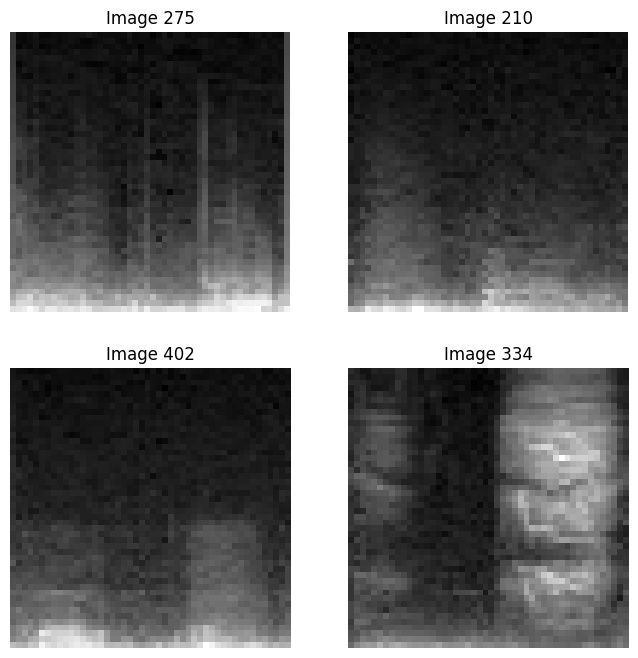

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

# Get the list of PNG files in the directory
png_files = [file for file in os.listdir(directory_path) if file.endswith('.png')]

# List to store image arrays
all_images = []

# Loop through all PNG files
for filename in png_files:
    # Construct the full path to the PNG image
    image_path = os.path.join(directory_path, filename)

    # Load the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Ensure the image has the desired shape (48, 48, 1)
    img = cv2.resize(img, (48, 48))
    img = np.expand_dims(img, axis=-1)

    # Append the image array to the list
    all_images.append(img)

# Convert the list of arrays to a numpy array
all_images_array = np.array(all_images)
all_images_array=all_images_array/255

# Choose 4 random indices
random_indices = np.random.choice(len(all_images_array), 4, replace=False)

# Display the 4 random images in a 2x2 grid
plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 2, i)
    plt.imshow(all_images_array[idx].squeeze(), cmap='gray')
    plt.title(f"Image {idx + 1}")
    plt.axis('off')

plt.show()


# Convert to a tensorflow dataset

In [ ]:
import tensorflow as tf
import numpy as np


numpy_array = all_images_array

# Convert NumPy array to TensorFlow Dataset
tf_dataset = tf.data.Dataset.from_tensor_slices(numpy_array)
ds = tf_dataset

# 'tf_dataset' is now a TensorFlow Dataset object
# Each element of 'tf_dataset' represents a single image (slice along axis 0)


In [ ]:
# Do some data transformation
import numpy as np

In [ ]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [ ]:
# Getting data out of the pipeline
dataiterator.next()

array([[[0.29411765],
        [0.10196078],
        [0.1254902 ],
        ...,
        [0.10588235],
        [0.1254902 ],
        [0.25882353]],

       [[0.29803922],
        [0.12941176],
        [0.11764706],
        ...,
        [0.12156863],
        [0.12941176],
        [0.26666667]],

       [[0.29803922],
        [0.12156863],
        [0.11764706],
        ...,
        [0.10980392],
        [0.11764706],
        [0.26666667]],

       ...,

       [[0.65098039],
        [0.43529412],
        [0.51372549],
        ...,
        [0.40784314],
        [0.41960784],
        [0.55294118]],

       [[0.73333333],
        [0.64705882],
        [0.61176471],
        ...,
        [0.40784314],
        [0.49019608],
        [0.59215686]],

       [[0.88235294],
        [0.80784314],
        [0.7254902 ],
        ...,
        [0.65882353],
        [0.76078431],
        [0.76862745]]])

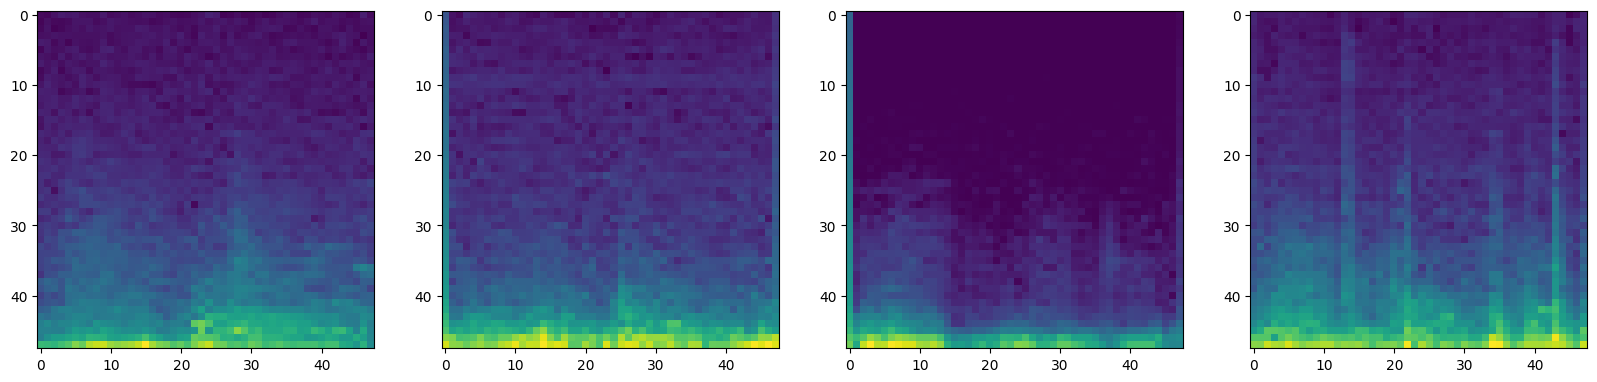

In [ ]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample))


# Prepare the dataset

In [ ]:
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up, in this case we have 886 files in the 01 folder
ds = ds.shuffle(886)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 48, 48, 1)

# Generator

In [ ]:
# sequential api for generator and discriminator
from tensorflow.keras.models import Sequential
# layers for NN
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [ ]:
def create_generator():
  model = Sequential()
  # Takes in random values and reshapes it to 12x12x128
  # Beginnings of a generated image
  model.add(Dense(12*12*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((12,12,128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

  return model

In [ ]:
generator = create_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18432)             2377728   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 18432)             0         
                                                                 
 reshape (Reshape)           (None, 12, 12, 128)       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 24, 24, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 128)       0         
                                                        

1/1 [==============================] - 0s 318ms/step


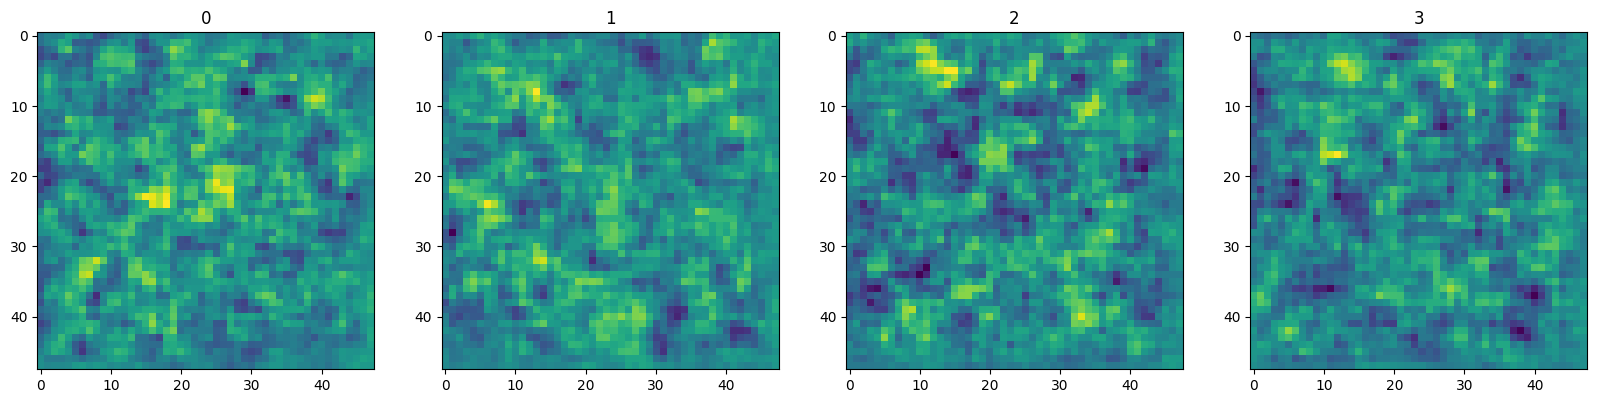

In [ ]:
import matplotlib.pyplot as plt
# Generate new spectrograms
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)

# Discriminator

In [ ]:
def create_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (48,48,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator = create_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 44, 44, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 44, 44, 32)        0         
                                                                 
 dropout (Dropout)           (None, 44, 44, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 40, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 40, 40, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 40, 40, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 36, 36, 128)      

# Training loop

In [ ]:
# Adam optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [ ]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

class spectroGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
# Create instance of subclassed model
specgan = spectroGAN(generator, discriminator)

In [ ]:
# Compile the model
specgan.compile(g_opt, d_opt, g_loss, d_loss)

# Callback to save images and weights during training

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

class ModelMonitor(Callback):
    def __init__(self, num_img=1, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):

        # Saving weights
        save_dir = weights_dir
        os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
        weightsg_file = os.path.join(save_dir, 'model_gweights.h5')
        weightsd_file = os.path.join(save_dir, 'model_dweights.h5')
        generator.save(weightsg_file)
        discriminator.save(weightsd_file)

        # Saving images
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join(images_dir, f'generated_img_{epoch}_{i}.png'))


# Training

In [ ]:
hist = specgan.fit(ds, epochs=2000, callbacks=[ModelMonitor()])

# Performance

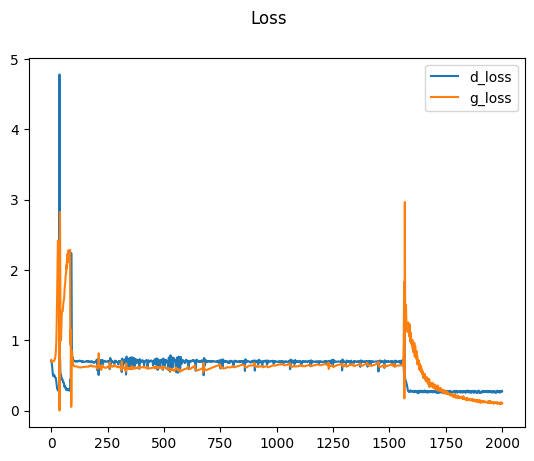

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# Generation of new images for the dataset

In [ ]:
# this section is used only if we have saved weights from previous trainings. Change current directory to your own directory and the same for filename
generator.load_weights(os.path.join('/kaggle/input/weights01/', 'generator_01_48x48.h5'))

1/1 [==============================] - 0s 456ms/step


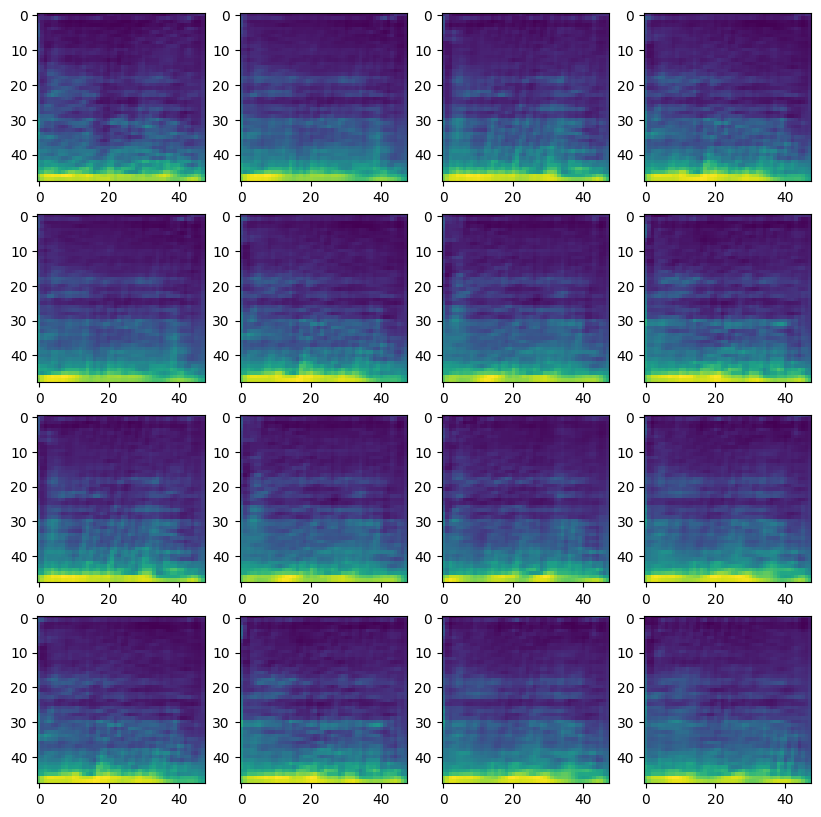

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

# Generate and save spectrograms

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import array_to_img


ch_location_vec = ["Tc", "A", "P", "Ll","Lr"]
acc_mode_vec = ["sc","mc"]
rec_equip_vec = ["AKGC417L","LittC2SE", "Meditron", "Litt3200"]

# values of mark 1 and 2 depend on what class we are generating: normal = 00,  crackles = 10, wheeze = 01, both = 11

# wheeze
mark1 = 0
mark2 = 1


# generation of the spectrograms with the trained weights

imgs = generator.predict(tf.random.normal((700, 128, 1)))

for idx,img_arr in enumerate(imgs):

    rand_attr = np.random.uniform(low=0, high=1, size=3)

#   random selection of recording features for the file names

    if rand_attr[0] <= 0.5:
        acc_mode = acc_mode_vec[0]
        id2 = "b"
        if rand_attr[1] <= 0.5:
            ch_location = ch_location_vec[0]
            id1 = 1
            id3 = 1
        else:
            ch_location = ch_location_vec[1]
            id1 = 2
            id3 = 2
    else:
        acc_mode = acc_mode_vec[1]
        id2 = "p"
        if rand_attr[1] <= 0.33:
            ch_location = ch_location_vec[2]
            id1 = 3
            id3 = 3
        else:
            id1 = 4
            id3 = 4
            if rand_attr[2] <= 0.5:
                ch_location = ch_location_vec[3]
            else:
                ch_location = ch_location_vec[4]

    if rand_attr[2] <= 0.14:
        if rand_attr[2] <= 0.07:
            rec_equip = rec_equip_vec[1]
        else:
            rec_equip = rec_equip_vec[3]
    elif rand_attr[2] <= 0.35 and rand_attr[2] > 0.14:
        rec_equip = rec_equip_vec[2]
    else:
        rec_equip = rec_equip_vec[0]

#     saving of spectrograms to previously created folder
    img = array_to_img(img_arr)
    img.save(os.path.join(images_dir, f'{idx + 226}_{id1}{id2}{id3}_{ch_location}_{acc_mode}_{rec_equip}_mark{mark1}{mark2}.png'))

22/22 [==============================] - 20s 896ms/step


In [ ]:
#   Use the following command to convert the folder with the generated spectrograms to a zip file. Change directory to fit yours.
    !zip -r generated_48x48_01_2000epochs.zip /kaggle/working/GANimages/01-wheeze